In [30]:
!jt -t grade3 -tf merriserif -tfs 16 -nf ptsans -nfs 16


We obtain the full problem of the concentration field:
\begin{cases}
\Delta \phi = 0 \quad  in \quad \Omega\\
\\
  \dfrac{\partial \phi}{\partial s}= 0 \quad  on \quad \partial \Omega_{east,west} \\
  \\
  \phi(R_{max}, s) = 0 \quad on \quad \partial \Omega_{ext} \\
  \\
  \dfrac{\partial \phi}{\partial r}= -\dfrac{1}{2 \pi R_v} q  \quad on \quad \Omega_{in} \\
\end{cases}  
<br>
<br>
and,
<br>
$$q=K_{eff} \pi R_v^2 (\langle \phi \rangle - \bar{\phi})$$
<br>
$$\bar{\phi}=\phi(r=R_v, s)$$

Implementation of the solution splitting technique with cylindrical symmetry around the vessel:


$$\phi= \phi_s + \phi_r$$

$\phi$ represents the scalar field that we want to recover 

$$\phi_s=G(r)q(s)$$






<br>
<br>
<br>
with: $$G(r)=-\dfrac{1}{2 \pi D}log(\dfrac{r}{R_v})$$

due to the property that:
<br>
<br>

$$\dfrac{d G(r)}{d r}= -\dfrac{1}{2 \pi R_v} \quad for \quad r=Rv$$
<br>
Therefore, it simplifies the splitted problem since the inner boundary condition banishes for the regular term:
<br>
<br>
$$\dfrac{\partial \phi}{\partial r}= -\dfrac{1}{2 \pi R_v} q = q \dfrac{d G(r)}{d r} + \dfrac{\partial \phi_r}{\partial r}$$
<br>
Therefore:
$$\dfrac{\partial \phi_r}{\partial r}= 0  \quad on \quad \Omega_{in}$$
<br>
<br>
<br>
<br>


<br>
$$\Delta \phi = \Delta (G(r)q(s)) + \Delta \phi_r$$
<br>
$$-\delta_\Lambda \frac{q}{D} = (\Delta G(r))q(s) + 2\nabla G \cdot \nabla q + Gq"(s) +  \Delta \phi_r$$
<br>

For this particular problem we have:
$$\Delta \phi_r = -G(r)\frac{d^2 q}{d s^2}$$
<br>
with the following boundary conditions:
<br>
<br>
$$\frac{\partial \phi_r}{\partial s}= - G(r)\frac{\partial q(s)}{\partial s} \quad  on \quad \partial \Omega_{east,west}$$
<br>
$$\phi_r(R_{max}, s) = -G(R_{max})q(s) \quad on \quad \partial \Omega_{ext}$$
<br>
<br>

For the internal boundary conditions (near the vessel wall:
<br>
$$\nabla \phi \cdot \mathbf{n} = - \frac{q(s)}{2 \pi R_v}$$
in this case $\mathbf{n}= - \mathbf{e}_r$ 
<br>
Therefore:
$$\frac{\partial \phi}{\partial r}= \frac{q(s)}{2 \pi R_v} \quad on \quad \Omega_{in}$$
<br>
Further:
$$\nabla(G(r)q(s))\cdot (-\mathbf{e_r})=\frac{q(s)}{2 \pi R_v}$$
<br>
Therefore:
$$\frac{\partial \phi_r}{\partial r}= 0 \quad on \quad \Omega_{in}$$

<br>
We obtain the full problem:
<br>
\begin{cases}
\Delta \phi_r = -G(r)\dfrac{d^2 q}{d s^2} \quad  in \quad \Omega\\
\\
  \dfrac{\partial \phi_r}{\partial s}= - G(r)\dfrac{\partial q(s)}{\partial s} \quad  on \quad \partial \Omega_{east,west} \\
  \\
  \phi_r(R_{max}, s) = -G(R_{max})q(s) \quad on \quad \partial \Omega_{ext} \\
  \\
  \dfrac{\partial \phi_r}{\partial r}= 0 \quad on \quad \Omega_{in} \\
\end{cases}  


Notice how the regular term field is not conservative (RHS of the PDE). Further, this consumption term (if the second derivative is positive) could be added to the tissue consumtion term without modification of the numerical scheme

<br>
<br>
<br>
<br>
Numerical scheme of coupled system:
unknowns -> The FV cells concentration value and the flux 

For now, the intravascular concentration is given by the variable phi_vessel

Assemble of the problem
$$
M=
\begin{bmatrix}
[\Theta] & [b] \\
[c] & [d] 
\end{bmatrix} 
$$

For the steady state problem:
$$
M * \begin{Bmatrix}{v} \\ q\end{Bmatrix}= \begin{Bmatrix}{0} \\ \langle \phi \rangle\end{Bmatrix}
$$
<br>

Theta represents the Laplacian operator in the following way. From the problem we have 

$$
v=\phi_r
$$

$$
\Delta v = -F \quad  in \quad \Omega\\
$$

$$
F=G(r)\dfrac{d^2 q}{d s^2} 
$$


$\Theta$ represents the discrete operator of the laplacian inside of the domain minus the boundary fluxes (that depend on the boundary conditions).

$$\Theta(v) \approx \frac{\iiint_{\Omega_k} \nabla^2 v dV - \oint_{\partial \Omega_k} \nabla_{n} v dS}{V_{\Omega_k}}$$

$$\oint_{\partial \Omega_k} \nabla_{n} v dS = \oint_{east, west} \nabla_{n} v dS$$

Therefore:

$$\Theta(v) \approx \dfrac{\iiint_{\Omega_k} -F dV + \iint_{east} G(r)\dfrac{\partial q(s=L)}{\partial s}  dS-\iint_{west} G(r)\dfrac{\partial q(s=0)}{\partial s} dS}{V_{\Omega_k}}$$

 


Given a constant discretization size of a cell k: $\Delta s, \Delta r$, together with the cylindrical symmetry allow for the simplification of the above integrals:

<br>

$$\Theta(v) \approx \dfrac{2 \pi \int_{r_k} -G(r)rdr \int_{s_k}\dfrac{d^2 q}{d s^2}ds  + 2 \pi \dfrac{\partial q(s=L)}{\partial s} \int_{r_k} G(r)r dr}{2 \pi r_k \Delta r \Delta s}$$

<br>
<br>

$$
\Theta(v) \approx \dfrac{-\int_{s_k}\dfrac{d^2 q}{d s^2}ds  +  \dfrac{\partial q(s=L)}{\partial s} }{r_k \Delta r \Delta s} \int_{r_k} G(r)r dr 
$$ 

For the east boundary conditions

Therefore, for the numerical scheme: 
$$
M=
\begin{bmatrix}
[\Theta] & [b] \\
[c] & [d] 
\end{bmatrix} 
$$

<br>
<br>

$$[a]=\Theta$$

<br>

$$[b]=\dfrac{\int_{s_k}\dfrac{d^2 q}{d s^2}ds  \pm  \dfrac{\partial q(s=west,east)}{\partial s} }{r_k \Delta r \Delta s} \int_{r_k} G(r)r dr $$

<br>

To assemble the lower part of the matrix M:
<br>
<br>
$$
[c]*{v}+[d]*q=\langle \phi \rangle
$$

<br>

$$
{v(bouundary_{inner})} + \dfrac{1}{K_{eff} \pi Rv^2} {q} = \langle \phi \rangle
$$

<br>
<br>
<br>

$$
M=
\begin{bmatrix}
[\Theta] & \Bigg[ \dfrac{\int_{s_k}\dfrac{d^2 q}{d s^2}ds  \pm  \dfrac{\partial q(s=west,east)}{\partial s} }{r_k \Delta r \Delta s} \int_{r_k} G(r)r dr \Bigg] \\
[Id] & \Big[ \dfrac{1}{K_{eff} \pi Rv^2} \Big] 
\end{bmatrix} 
$$


and the full stationary problem:

$$
M * \begin{Bmatrix}{v} \\ q\end{Bmatrix}= \begin{Bmatrix}{0} \\ \langle \phi \rangle\end{Bmatrix}
$$

Important topics:

- The following example shows the comparison between: a fine numerical solution used as validation, a solution splitting with very coarse grid, and a coarser solution with a standard FV numerical scheme. Each solution is denominated as: validation, 45x45 and SS (solution splitting) respectively

- The resolution of each domain is 150x150, 5x5, 49x49 FV cells respectively.

- The discretization of the vessel is the same for all three solutions!

- Due to the different resolution of the domain there are challenges when comparing the solutions! Interpolation and local averaging will be needed to do some comparisons




In [31]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import scipy as sp
import scipy.sparse.linalg
import time
plt.rcParams["figure.figsize"] = (16,16)
plt.rcParams.update({'font.size': 18})
from cylindrical_problem_assembly import *

from cylindrical_coupling_assembly import *

Firstly, the domain needs to be defined. As well as the grid size for the reference solution

In [32]:
R_max=1
L=1
fine_s_points=150
fine_r_points=150
Rv=0.05
D=1
K_eff=2/(np.pi*Rv**2)
inner_modification=False
west_mode=False
my_west_mode=True
sour="cosine" #shape of the source profile

With the geometrical values and the Diff coeff and the permeability defined we create the simplify_assembly_Laplacian object.
This class creates the $\Theta$ discrete operator. Which, as explained before, represents the discrete laplacian minus the boundary fluxes.

In the following cell, the object is created, as well as the imposed concentration field of the intravascular variable.

Text(0.5, 1.0, 'Fixed averaged concentration profile along the vessel centerline')

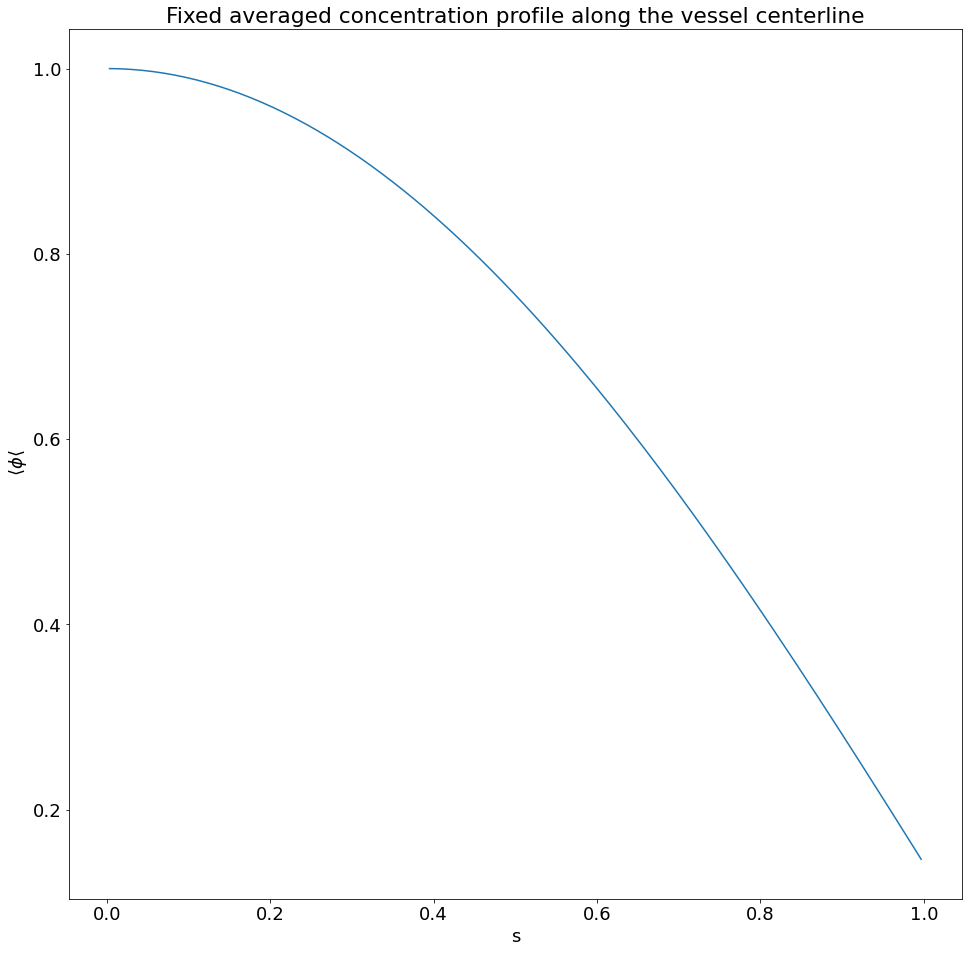

In [33]:
#Let's create the Laplacian operator with the proper boundary conditions (Dirichlet north and 
#no flux east and west)
obj_fine=simplified_assembly_Laplacian_cylindrical(R_max, Rv,fine_r_points,fine_s_points, L, D)

if sour=="cosine":
    #Set an analytical source profile
    phi_vessel=np.cos(obj_fine.s/(L*0.7))
if sour=="constant":
    phi_vessel=np.zeros(len(obj_fine.s))+1
if sour=="sine":
    phi_vessel=np.sin(obj_fine.s/(L*0.7))

kernel=get_first_der(phi_vessel,obj_fine.inc_s)
phi_first=kernel.dot(phi_vessel)

plt.plot(obj_fine.s,phi_vessel)
plt.xlabel("s")
plt.ylabel(" $ \langle \phi \langle $ ")
plt.title("Fixed averaged concentration profile along the vessel centerline")



In [34]:
f_hs, f_hr=obj_fine.inc_s, obj_fine.inc_r
f_r=obj_fine.r
f_s=obj_fine.s
f_factor=1/(np.pi*(2*Rv+f_hr)*f_hr)
ff_factor=1/(2*np.pi*f_r[0]*f_hr)

Lap_virgin=obj_fine.assembly().toarray()
Lap_operator=obj_fine.assembly().toarray()

Set the 0 Dirichlet BC on the outer boundary (The no flow boundary conditions are implicitly set through the operator $\Theta$)

In [35]:
#Set Dirichlet on the outer boundary
ext_boundary=np.concatenate([[obj_fine.corners[2]], obj_fine.outer_boundary, [obj_fine.corners[3]]])
Lap_operator[ext_boundary,:]=0
Lap_operator[ext_boundary,ext_boundary]=1

In [36]:
in_boundary=np.concatenate([[obj_fine.corners[0]], obj_fine.inner_boundary, [obj_fine.corners[1]]])
east_boundary=np.concatenate([[obj_fine.corners[1]], obj_fine.east_boundary, [obj_fine.corners[3]]])

In [37]:
#NOW THE FUNCTION THAT SOLVES THE PROBLEM GETS INVOKED
rhs_real_fine_coupled=np.zeros(len(obj_fine.s)*len(obj_fine.r))
SRFC=get_sol_coupled(Lap_operator, phi_vessel, Rv, f_hr, f_hs, in_boundary, K_eff*np.pi*Rv**2, rhs_real_fine_coupled)


The incoming flux can be calculated in two ways:

Text(0, 0.5, '$kg m^{-1} s^{-1}$')

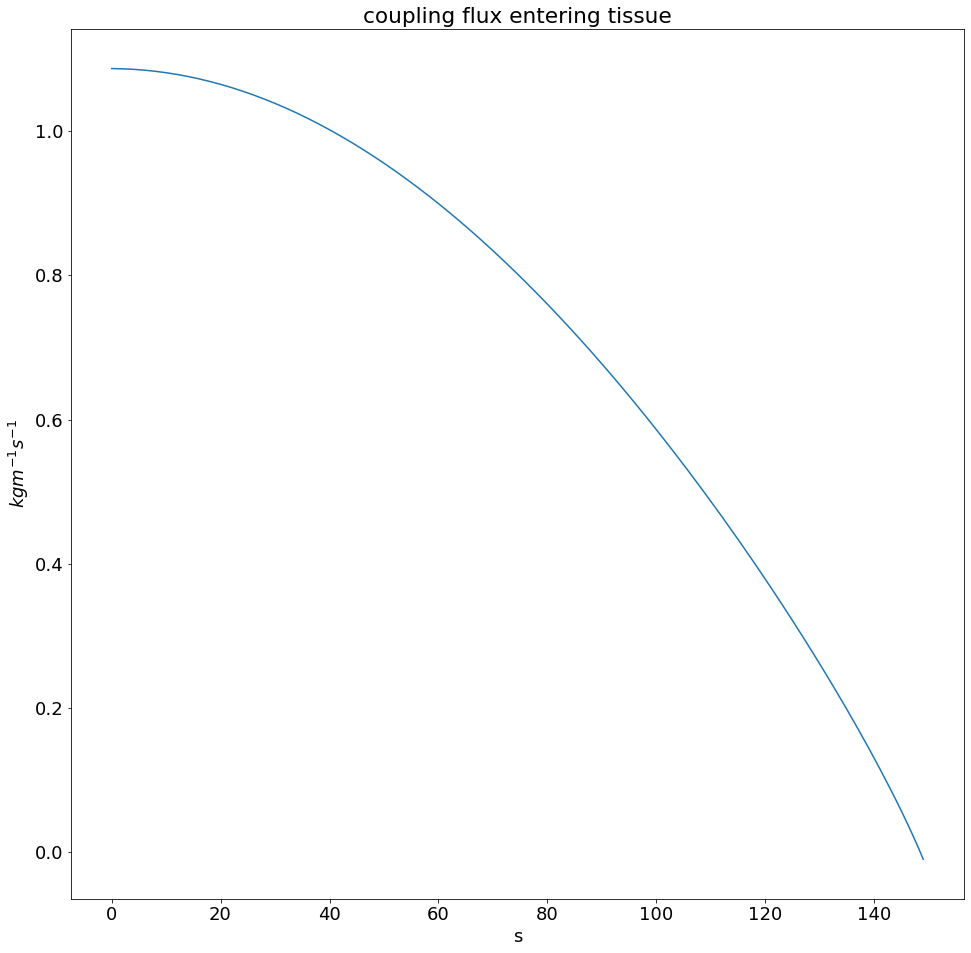

In [38]:
q_coupled_wall=K_eff*np.pi*Rv**2*(phi_vessel-SRFC[0,:]) 
#The reference solution is obtained for this concentration profile: SRFC
new_operator=obj_fine.assembly().toarray()
in_flux=-new_operator[in_boundary].dot(np.ndarray.flatten(SRFC))/ff_factor
plt.plot(in_flux)
plt.title("coupling flux entering tissue")
plt.xlabel("s")
plt.ylabel("$kg m^{-1} s^{-1}$")

The scalar field solution is validated using the q_imposed solver *. 

*The q_imposed solver is developed prior to the coupled solver since it is way easier (and needed) to validate. The vessel influx is imposed (we do not consider the phase separation at the vessel wall), and the scalar field is given. The q_imposed solver is validated by the analytical solution of the PDE.

/home/pdavid/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


472.6594581181515
472.6594581181515


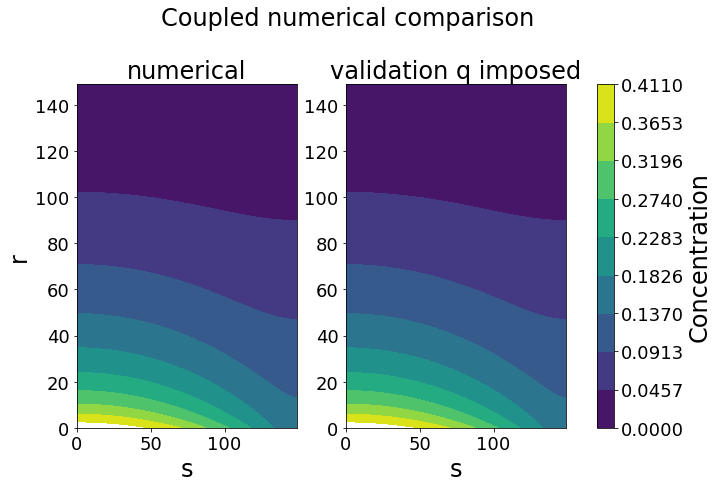

In [39]:
SRFQ=get_validation_q_imposed_outerDirichlet(in_flux, R_max, Rv, fine_r_points, fine_s_points,L,D)
sol_reference_fine=get_validation_q_imposed_outerDirichlet(in_flux, R_max, Rv, fine_r_points, fine_s_points,L,D)

compare_full_solutions(SRFC, sol_reference_fine, "numerical", "validation q imposed",[0,np.max(sol_reference_fine)], "Coupled numerical comparison")


This plot corresponds to the validation of the reference here with the code that was previously validated analytically. Therefore, I use an already validated (simpler) code to validate this one

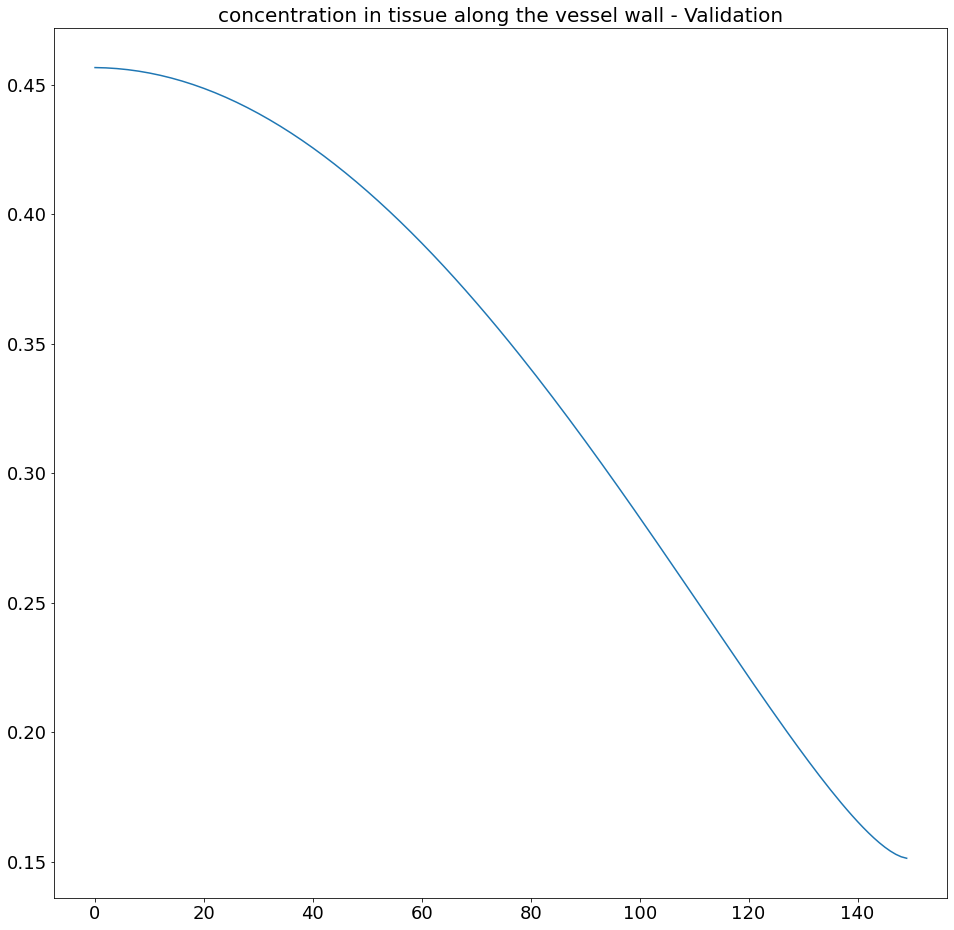

In [40]:
plt.plot(SRFC[0,:])
plt.title("concentration in tissue along the vessel wall - Validation", fontsize=20)
plt.show()

In [41]:
coarse_s_points=5
coarse_r_points=5

k=get_coupled_problem_matrix(R_max, Rv, coarse_r_points, coarse_s_points, L,D, fine_s_points, fine_r_points)
M=k.assemble_full_problem(K_eff)

c_s=k.c_s
c_hs=k.c_hs
c_r=k.c_r
c_hr=k.c_hr

M_ghosts=k.assemble_problem_Dirichlet_north_ghost(K_eff)

#Flux BC
s=M.shape
IC=np.zeros(s[0])
IC[-len(phi_vessel):]=phi_vessel
v=sp.sparse.linalg.spsolve(M,IC)
q=v[-len(phi_vessel):]
#plt.plot(q)
phi_r=v[:k.total].reshape(len(k.c_r),len(k.c_s))
sing=np.outer(Green(k.f_r,Rv), q)
interp=np.zeros([len(k.f_r), len(k.f_s)])
d=c=0
for i in k.f_r:
    d=0
    for j in k.f_s:
        t=linear_interpolation(i, j, phi_r, k.c_r, k.c_s, k.c_hs, k.c_hr )
        
        interp[c,d]=t
        d+=1
    c+=1

#Ghosts
v_ghosts=sp.sparse.linalg.spsolve(M_ghosts,IC)
VghostsSC1C=v_ghosts[:M_ghosts.shape[0]-len(phi_vessel)].reshape(coarse_r_points+1,coarse_s_points)


/home/pdavid/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/pdavid/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/home/pdavid/anaconda3/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


[[-135.3  270.7 -135.3 ...    0.     0.     0. ]
 [   0.     0.     0.  ...    0.     0.     0. ]
 [   0.     0.     0.  ...    0.     0.     0. ]
 ...
 [   0.     0.     0.  ...    0.     0.     0. ]
 [   0.     0.     0.  ...    0.     0.     0. ]
 [   0.     0.     0.  ... -368.4  739.2 -368.4]]
[[-135.3  270.7 -135.3 ...    0.     0.     0. ]
 [   0.     0.     0.  ...    0.     0.     0. ]
 [   0.     0.     0.  ...    0.     0.     0. ]
 ...
 [   0.     0.     0.  ...    0.     0.     0. ]
 [   0.     0.     0.  ...    0.     0.     0. ]
 [   0.     0.     0.  ...   -0.    -0.    -0. ]]


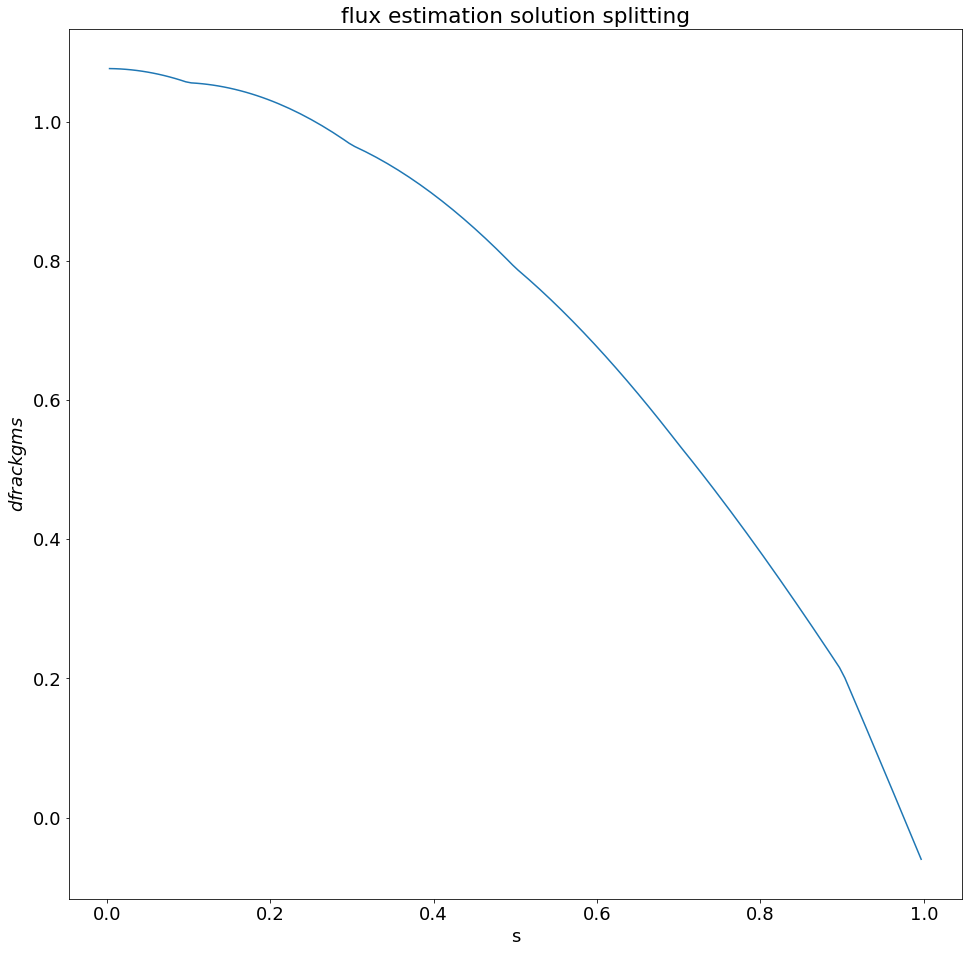

In [42]:
pp=interp_kernel_oneD(c_s,c_hs, f_s, f_hs)
kernel=sp.sparse.csc_matrix((pp[0], (pp[1], pp[2])), shape=(len(f_s), len(c_s)))

ii=kernel.dot(VghostsSC1C[0])
q_ghosts_1=v_ghosts[(coarse_r_points+1)*(coarse_s_points):]
q_ghosts=K_eff*np.pi*Rv**2*(phi_vessel-kernel.dot(VghostsSC1C[0]))
plt.plot(f_s, q_ghosts)
plt.xlabel("s")
plt.ylabel("$dfrac{kg}{ms}$")

plt.title("flux estimation solution splitting")

interp2=np.zeros([len(f_r), len(f_s)])
d=c=0
for i in f_r:
    d=0
    for j in f_s:
        t=linear_interpolation(i, j, VghostsSC1C, c_r, c_s, c_hs, c_hr )
        
        interp2[c,d]=t
        d+=1
    c+=1

#tests of ghost
# =============================================================================
# pp=a[k.north_boundary,:]*np.ndarray.flatten(v_ghosts)
# plt.plot(k.c_s,pp); plt.plot(k.f_s, -2*Green(R_max, Rv)*q_ghosts)
# 
# =============================================================================
sol_final=sing+interp
SSC1C=sol_final


Text(0.5, 1.0, 'SS locally averaged')

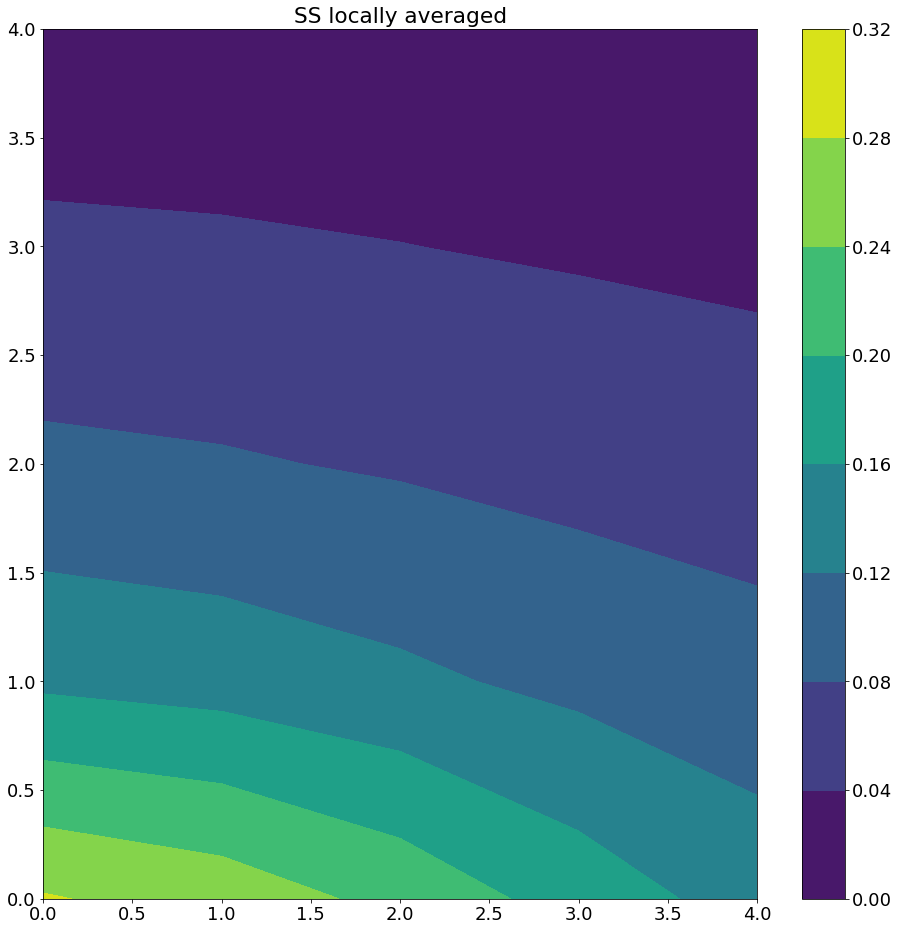

In [43]:
h=len(phi_vessel)/len(c_s)
uu=np.linspace(h/2,len(phi_vessel)-h/2,len(c_s)).astype(int)
phi_coarse=phi_vessel[uu]
avg_Green=Green(c_r[:-1], Rv)
q_split_coarse=K_eff*Rv**2*np.pi*(phi_coarse-VghostsSC1C[0,:])
avg_sol_split=np.outer(avg_Green,q_split_coarse)+VghostsSC1C[:-1,:]
plt.contourf(avg_sol_split); plt.colorbar(); plt.title("SS locally averaged")

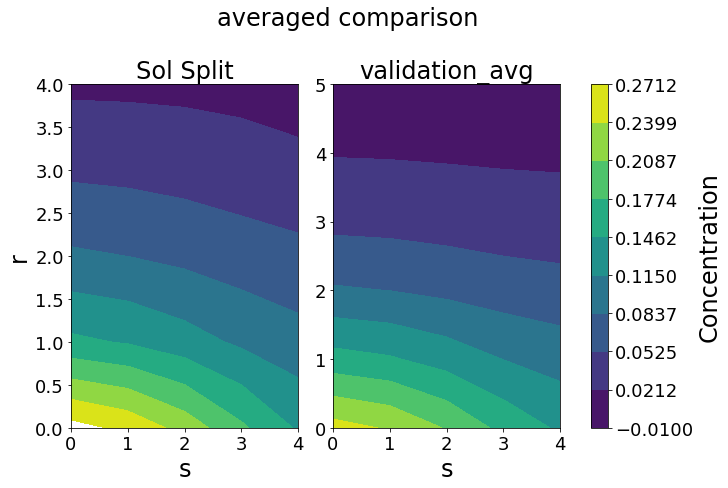

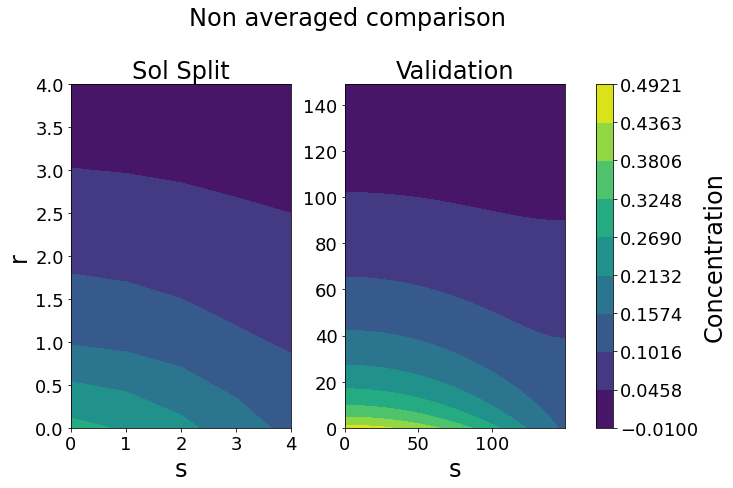

In [44]:
ss=get_averaged_solution(c_r, c_s, f_r, f_s, SSC1C, c_hr, c_hs)
ss_ref=get_averaged_solution(c_r, c_s, f_r, f_s, SRFC, c_hr, c_hs)

compare_full_solutions(avg_sol_split, ss_ref, "Sol Split", "validation_avg",[-0.01,np.max(ss_ref)*1.2], "averaged comparison")

compare_full_solutions(avg_sol_split, SRFC, "Sol Split", "Validation",[-0.01,np.max(SRFC)*1.2], "Non averaged comparison")


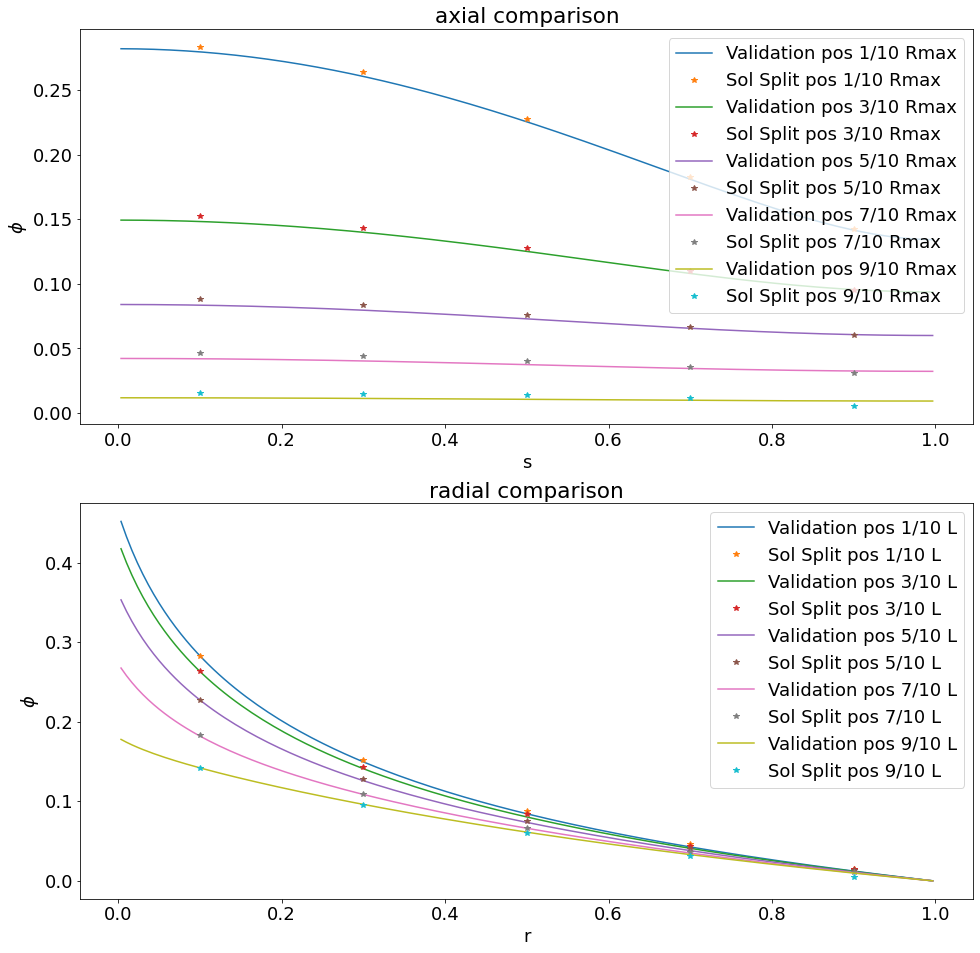

In [45]:
sh=avg_sol_split.shape
hr=SRFC.shape[0]/sh[0]
hs=SRFC.shape[1]/sh[1]
uur=np.linspace(hr/2,SRFC.shape[0]-hr/2,sh[0]).astype(int)
uus=np.linspace(hs/2,SRFC.shape[1]-hs/2,sh[1]).astype(int)
SRFC_coarse_s=SRFC[uur,:]
SRFC_coarse_r=SRFC[:,uus]

fig3 = plt.figure(figsize=(16, 16))
ax1 = fig3.add_subplot(2, 1, 1)
ax2 = fig3.add_subplot(2, 1, 2)

for i in range(sh[0]):
    ax1.plot(f_s, SRFC_coarse_s[i,:], label="Validation pos {}/10 Rmax".format(2*i+1))
    ax1.plot(c_s, avg_sol_split[i,:], '*', label="Sol Split pos {}/10 Rmax".format(2*i+1))
    ax1.set_title("axial comparison")
    ax1.set_xlabel("s")
    ax1.set_ylabel("$\phi$")
    ax1.legend()

for j in range(sh[1]):
    ax2.plot(f_s, SRFC_coarse_r[:,j], label="Validation pos {}/10 L".format(2*j+1))
    ax2.plot(c_s, avg_sol_split[:,j], '*',label="Sol Split pos {}/10 L".format(2*j+1))
    ax2.set_title("radial comparison")
    ax2.set_xlabel("r")
    ax2.set_ylabel("$\phi$")
    ax2.legend()
    
    
    



Text(0.5, 1.0, 'positions axial comparison')

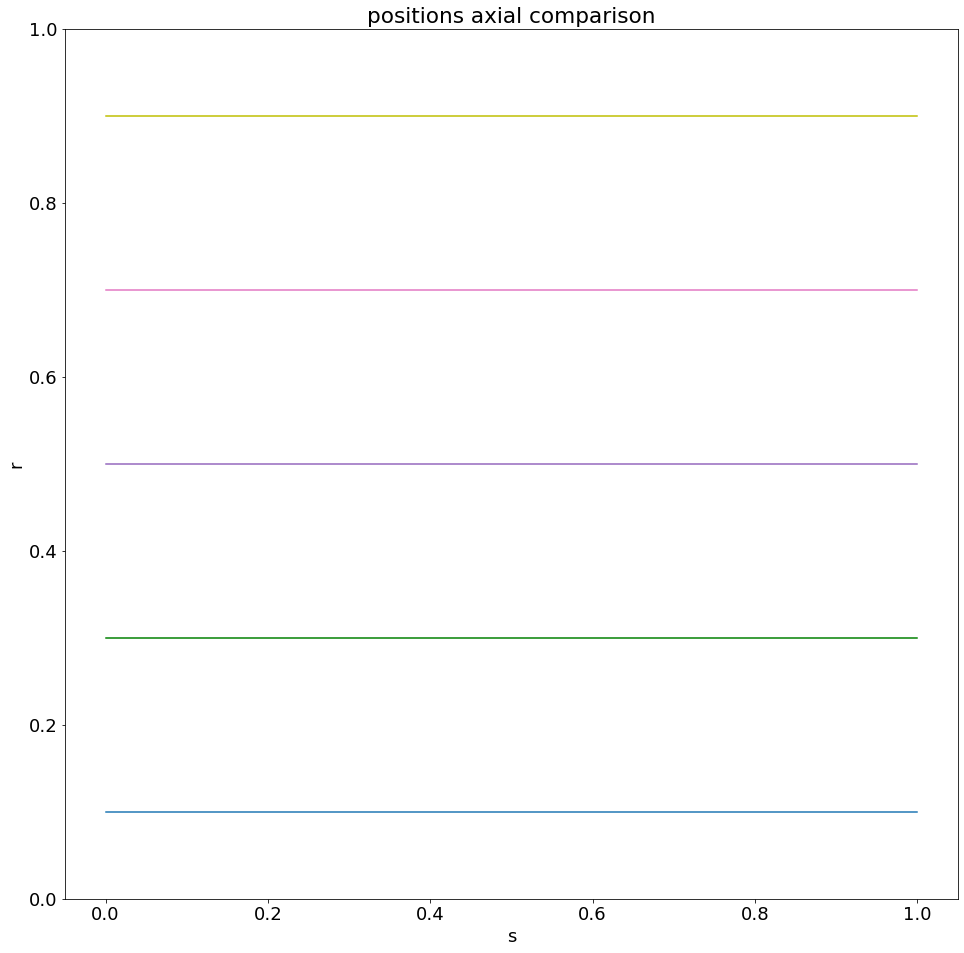

In [46]:
x=np.linspace(0,1,10)

plt.plot(x,np.zeros(len(x))+1/10, '#1f77b4');
plt.plot(x,np.zeros(len(x))+3/10, 'g');
plt.plot(x,np.zeros(len(x))+5/10, '#9467bd');
plt.plot(x,np.zeros(len(x))+7/10, '#e377c2');
plt.plot(x,np.zeros(len(x))+9/10, 'y');
plt.ylim((0,1))
plt.xlabel('s')
plt.ylabel('r')
plt.title("positions axial comparison")

Text(0.5, 1.0, 'positions radial comparison')

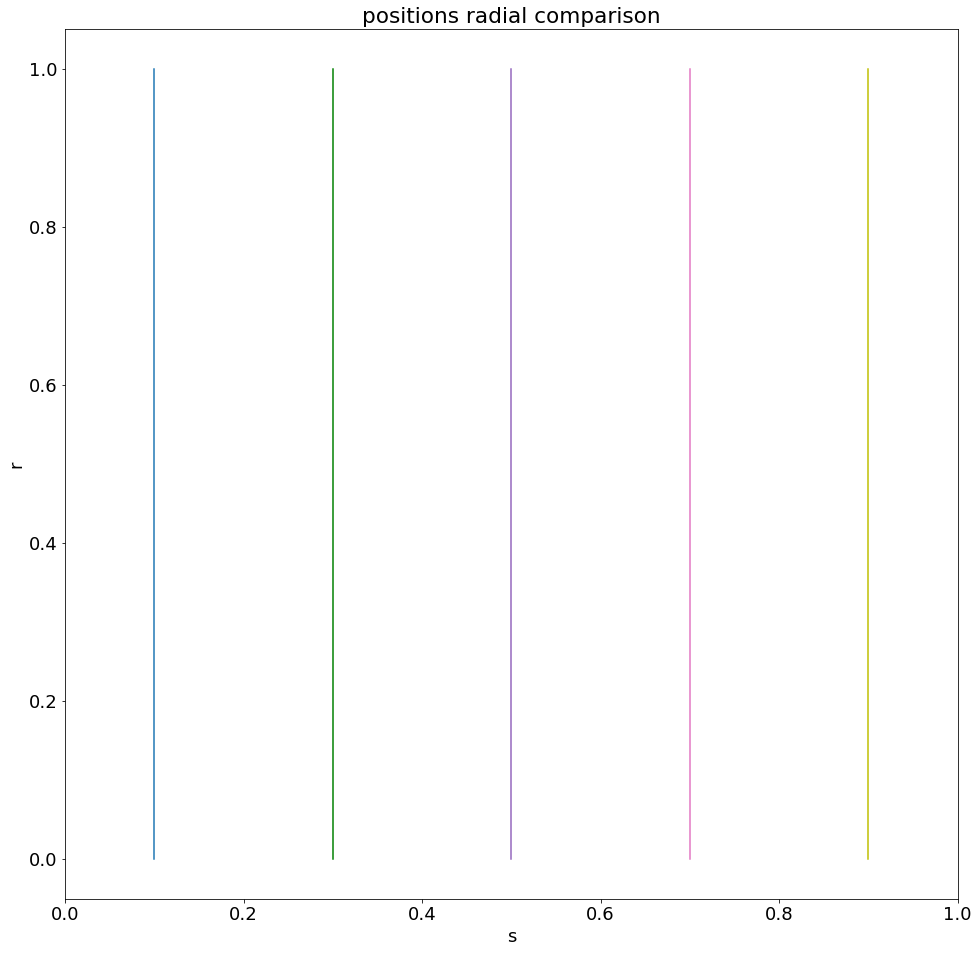

In [47]:
plt.plot(np.zeros(len(x))+1/10,x, '#1f77b4');
plt.plot(np.zeros(len(x))+3/10, x,'g');
plt.plot(np.zeros(len(x))+5/10, x,'#9467bd');
plt.plot(np.zeros(len(x))+7/10, x,'#e377c2');
plt.plot(np.zeros(len(x))+9/10, x,'y');
plt.xlim((0,1))
plt.xlabel('s')
plt.ylabel('r')
plt.title("positions radial comparison")


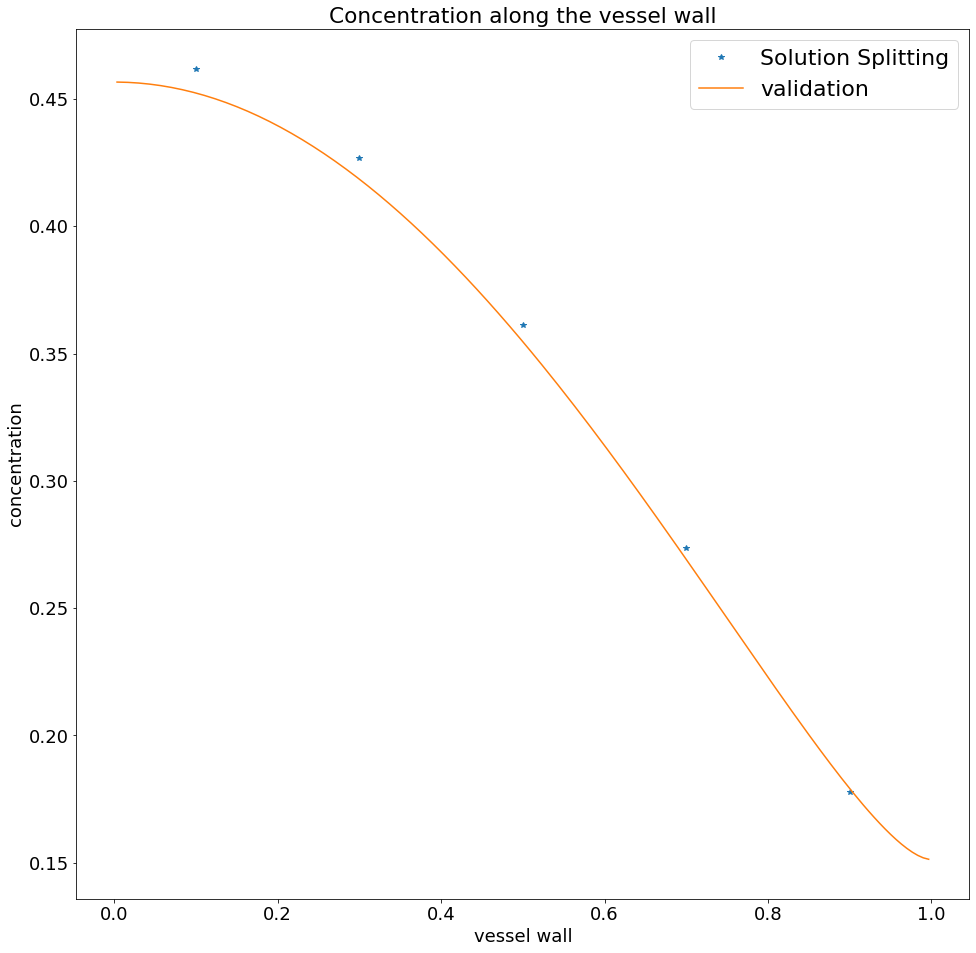

In [48]:
#Comparison
k=simplified_assembly_Laplacian_cylindrical(R_max, Rv,coarse_r_points,coarse_s_points, L, D)

#Set Dirichlet on the outer boundary
ext_boundary=np.concatenate([[k.corners[2]], k.outer_boundary, [k.corners[3]]])
Lap_operator=k.assembly().toarray()
Lap_operator[ext_boundary,:]=0
Lap_operator[ext_boundary,ext_boundary]=1

h=len(phi_vessel)/len(k.s)
uu=np.linspace(h/2,len(phi_vessel)-h/2,len(k.s)).astype(int)
phi_coarse=phi_vessel[uu]

inner_boundary=np.concatenate([[k.corners[0]],k.inner_boundary,[k.corners[1]]])

pp=get_sol_coupled(Lap_operator,phi_coarse, Rv, k.inc_r, k.inc_s, inner_boundary, K_eff*np.pi*Rv**2, np.zeros([len(k.r)*len(k.s)]))


plt.figure()
plt.plot(k.s, phi_r[0], '*', label="Solution Splitting")
plt.plot(f_s, SRFC[0,:], label="validation")
plt.xlabel("vessel wall")
plt.ylabel("concentration")
plt.title("Concentration along the vessel wall")
plt.legend(fontsize=22)
plt.savefig("Vessel wall estimation performance")






Text(0.5, 1.0, '49 x 49 numerical')

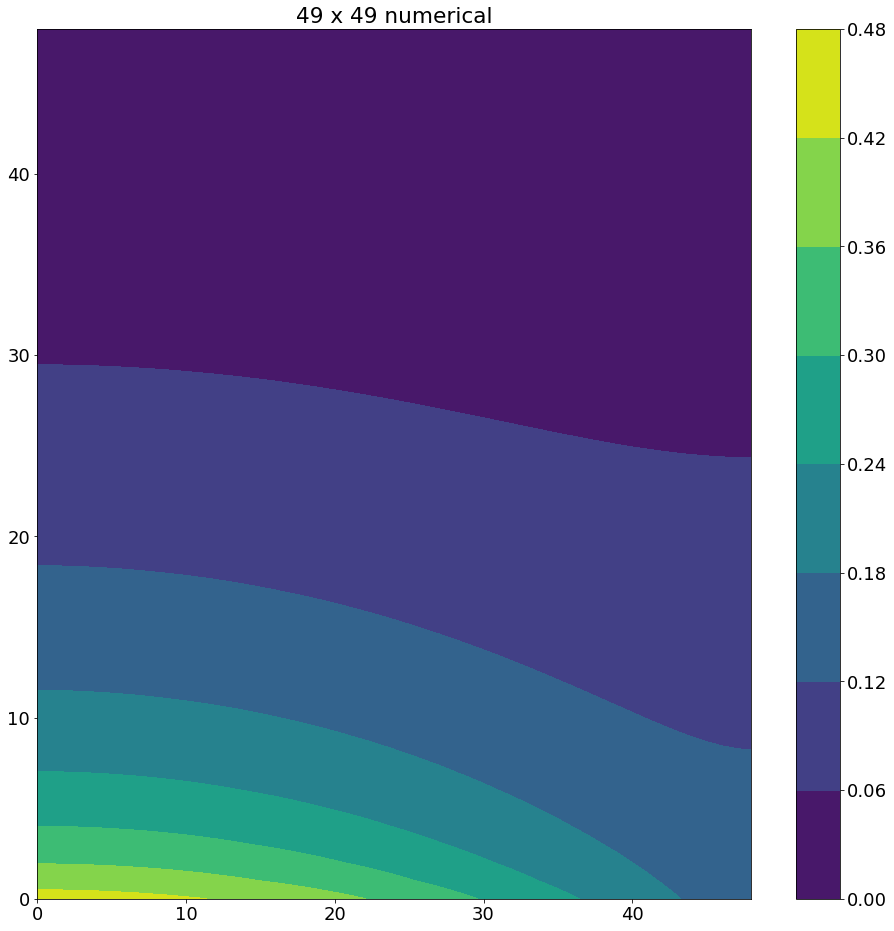

In [49]:
c2_r_points=49
c2_s_points=49



#Get coarse comparison
obj_coarse=simplified_assembly_Laplacian_cylindrical(R_max, Rv,c2_r_points,c2_s_points, L, D)
    
c2_hs, c2_hr=obj_coarse.inc_s, obj_coarse.inc_r
c2_r=obj_coarse.r
c2_s=obj_coarse.s
f_factor=1/(np.pi*(2*Rv+c2_hr)*c2_hr)
ff_factor=1/(2*np.pi*c2_r[0]*c2_hr)

Lap_operator=obj_coarse.assembly().toarray()

#Set Dirichlet on the outer boundary
ext_boundary=np.concatenate([[obj_coarse.corners[2]], obj_coarse.outer_boundary, [obj_coarse.corners[3]]])
Lap_operator[ext_boundary,:]=0
Lap_operator[ext_boundary,ext_boundary]=1



rhs_real_coarse_coupled=np.zeros(len(obj_coarse.s)*len(obj_coarse.r))
in_boundary=np.concatenate([[obj_coarse.corners[0]], obj_coarse.inner_boundary, [obj_coarse.corners[1]]])
east_boundary=np.concatenate([[obj_coarse.corners[1]], obj_coarse.east_boundary, [obj_coarse.corners[3]]])


#Up to here we have the laplacian operator "Lap_operator", with the Dirichlet BC set on hte outer boundary 
#and with phi_vessel defined
h=len(phi_vessel)/c2_s_points
uu=np.linspace(h/2,len(phi_vessel)-h/2,c2_s_points).astype(int)
phi_coarse=phi_vessel[uu]
#NOW THE FUNCTION THAT SOLVES THE PROBLEM GETS INVOKED
sol_reference_coarse_coupled=get_sol_coupled(Lap_operator, phi_coarse, Rv, c2_hr, c2_hs, in_boundary, K_eff*np.pi*Rv**2, rhs_real_coarse_coupled)
SRCC=sol_reference_coarse_coupled
plt.contourf(sol_reference_coarse_coupled); plt.colorbar(); plt.title("{} x {} numerical".format(c2_s_points,c2_r_points))


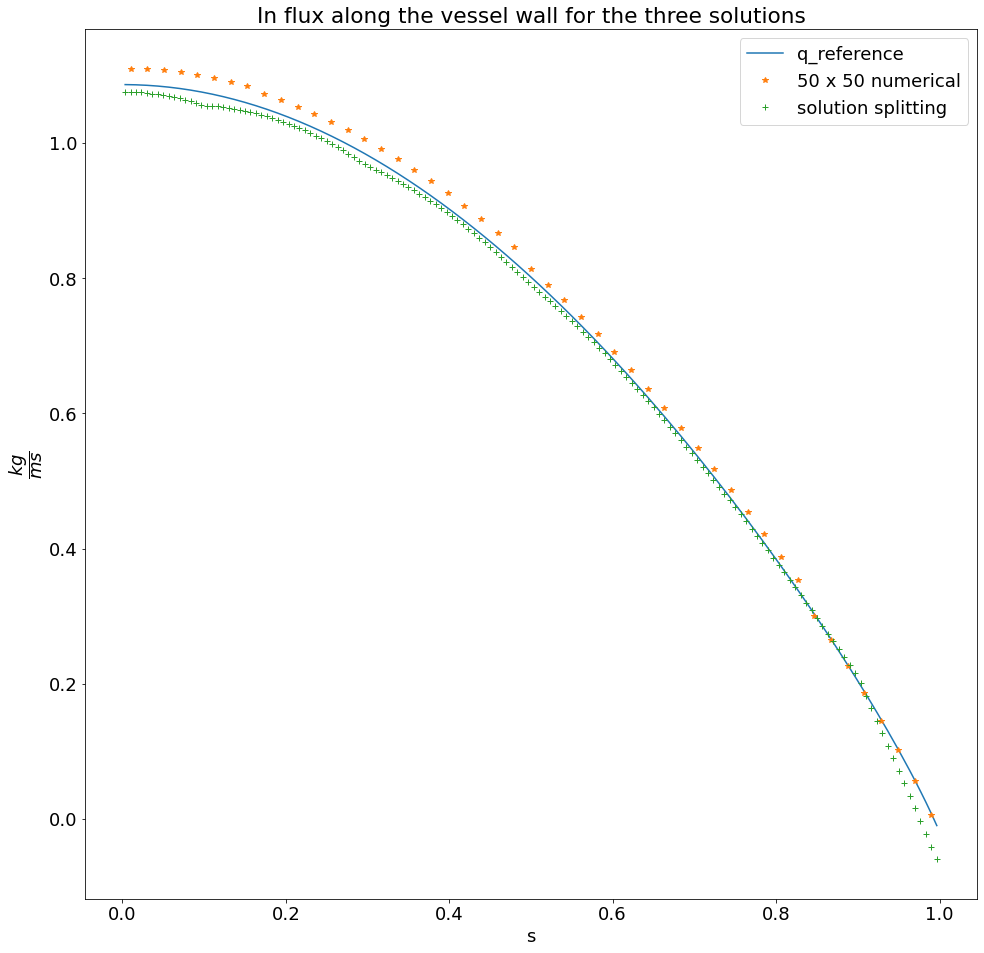

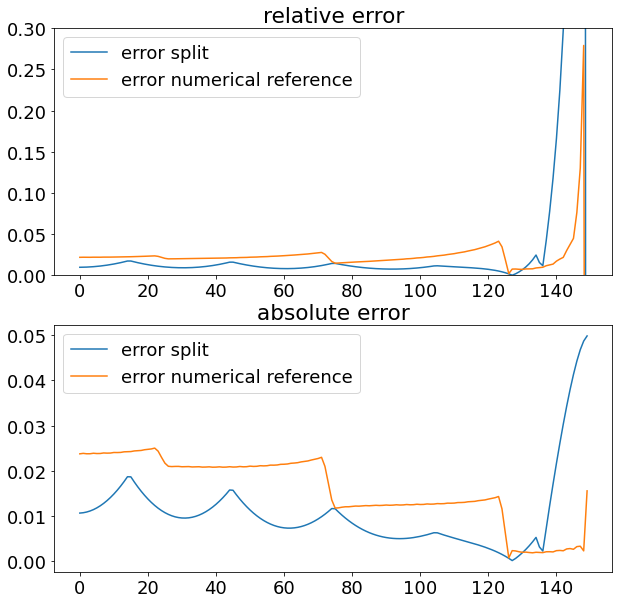

In [50]:
#Flux estimation!
q_reference_coarse=K_eff*np.pi*Rv**2*(phi_coarse-sol_reference_coarse_coupled[0])

plt.figure()
plt.plot(f_s, in_flux, label="q_reference")
plt.plot(c2_s, q_reference_coarse, '*',label="{} x {} numerical".format(c2_s_points+1,1+c2_r_points))
plt.plot(f_s, q_ghosts,'+',label="solution splitting")
plt.xlabel("s")
plt.ylabel("$\dfrac{kg}{m s}$")
plt.title("In flux along the vessel wall for the three solutions")
plt.legend()

pp=interp_kernel_oneD(c2_s, c2_hs, f_s, f_hs)
kernel=sp.sparse.csc_matrix((pp[0], (pp[1], pp[2])), shape=(len(f_s), len(c2_s)))
num_interp=kernel.dot(q_reference_coarse)
err_numerical=np.abs(num_interp-in_flux)/in_flux

err_splitting=np.abs(q_ghosts-in_flux)/in_flux

fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(2, 1, 1)
ax2 = fig1.add_subplot(2, 1, 2)

ax1.plot(err_splitting, label="error split")
ax1.plot(err_numerical, label="error numerical reference")
ax1.set_title("relative error")
ax1.set_ylim(0, 0.3)
ax1.legend()

ax2.plot(err_splitting*in_flux, label="error split")
ax2.plot(err_numerical*in_flux, label="error numerical reference")
ax2.set_title("absolute error")
ax2.legend()


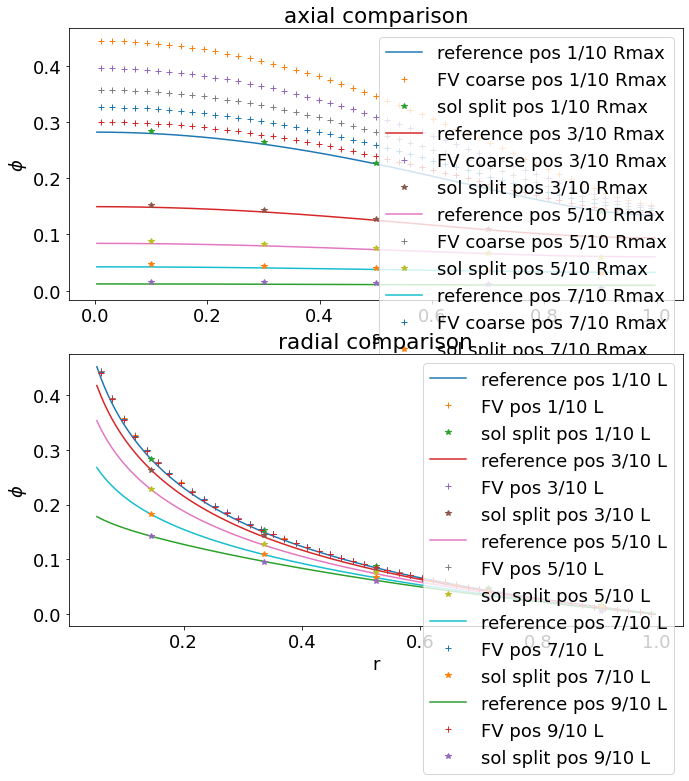

In [51]:
sh=avg_sol_split.shape
hr=SRFC.shape[0]/sh[0]
hs=SRFC.shape[1]/sh[1]
uur=np.linspace(hr/2,SRFC.shape[0]-hr/2,sh[0]).astype(int)
uus=np.linspace(hs/2,SRFC.shape[1]-hs/2,sh[1]).astype(int)
SRFC_coarse_s=SRFC[uur,:]
SRFC_coarse_r=SRFC[:,uus]

shc=SRCC.shape
hrc=SRCC.shape[0]/shc[0]
hsc=SRCC.shape[1]/shc[1]
uurc=np.linspace(hrc/2,SRCC.shape[0]-hrc/2,shc[0]).astype(int)
uusc=np.linspace(hsc/2,SRCC.shape[1]-hsc/2,shc[1]).astype(int)
SRCC_coarse_s=SRCC[uurc,:]
SRCC_coarse_r=SRCC[:,uusc]

fig3 = plt.figure(figsize=(11, 11))
ax1 = fig3.add_subplot(2, 1, 1)
ax2 = fig3.add_subplot(2, 1, 2)

for i in range(sh[0]):
    ax1.plot(f_s, SRFC_coarse_s[i,:], label="reference pos {}/10 Rmax".format(2*i+1))
    ax1.plot(c2_s, SRCC_coarse_s[i,:], '+' ,label="FV coarse pos {}/10 Rmax".format(2*i+1))
    ax1.plot(c_s, avg_sol_split[i,:], '*', label="sol split pos {}/10 Rmax".format(2*i+1))
    ax1.set_title("axial comparison")
    ax1.set_xlabel("s")
    ax1.set_ylabel("$\phi$")
    ax1.legend()

for j in range(sh[1]):
    ax2.plot(f_r, SRFC_coarse_r[:,j], label="reference pos {}/10 L".format(2*j+1))
    ax2.plot(c2_r, SRCC_coarse_r[:,j],'+', label="FV pos {}/10 L".format(2*j+1))
    ax2.plot(c_r[:-1], avg_sol_split[:,j], '*',label="sol split pos {}/10 L".format(2*j+1))
    ax2.set_title("radial comparison")
    ax2.set_xlabel("r")
    ax2.set_ylabel("$\phi$")
    ax2.legend()


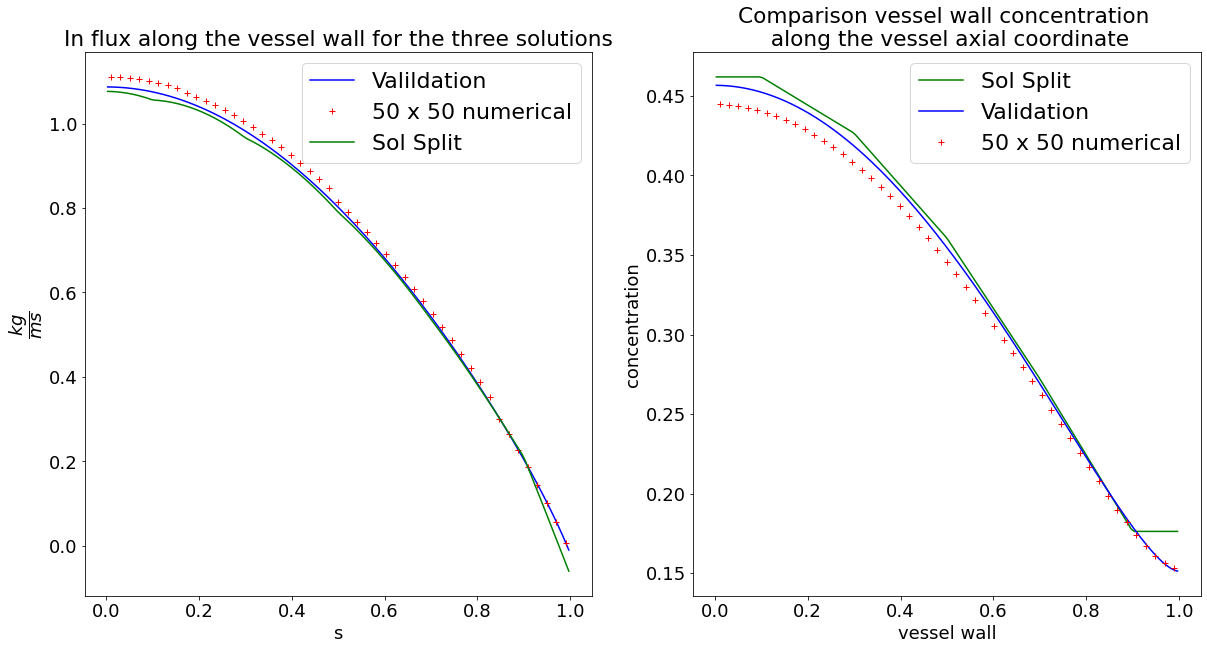

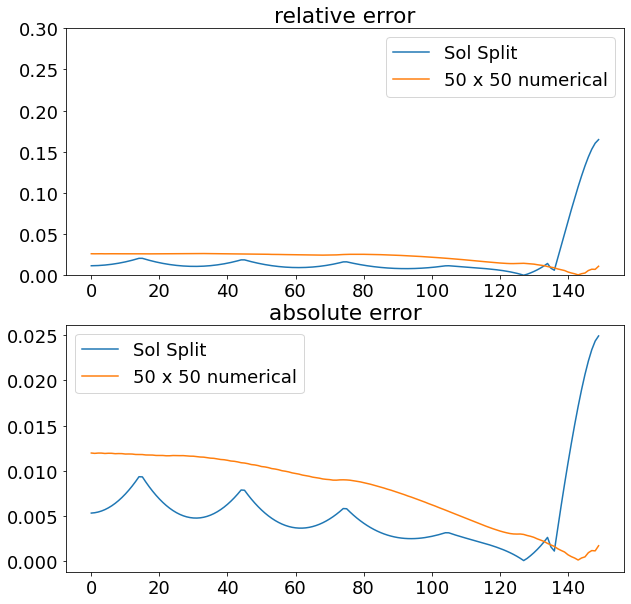

In [52]:

fig=plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(f_s, in_flux, 'b',label="Valildation")
ax1.plot(c2_s, q_reference_coarse, 'r+',label="{} x {} numerical".format(c2_s_points+1,1+c2_r_points))
ax1.plot(f_s, q_ghosts,'g',label="Sol Split")
ax1.set_xlabel("s")
ax1.set_ylabel("$\dfrac{kg}{m s}$")
ax1.set_title("In flux along the vessel wall for the three solutions")
ax1.legend(fontsize=22)

ax2.plot(f_s,ii, 'g',label="Sol Split")
ax2.plot(f_s, SRFC[0,:], 'b',label="Validation")
ax2.plot(c2_s, sol_reference_coarse_coupled[0],'r+', label="{} x {} numerical".format(c2_s_points+1,c2_r_points+1))
ax2.set_xlabel("vessel wall")
ax2.set_ylabel("concentration")
ax2.set_title("Comparison vessel wall concentration \n along the vessel axial coordinate")
ax2.legend(fontsize=22)


err_splitting=np.abs(ii-SRFC[0,:])/SRFC[0,:]
pp=interp_kernel_oneD(c2_s, c2_hs, f_s, f_hs)
kernel=sp.sparse.csc_matrix((pp[0], (pp[1], pp[2])), shape=(len(f_s), len(c2_s)))
num_interp=kernel.dot(sol_reference_coarse_coupled[0])
err_numerical=np.abs(num_interp-SRFC[0,:])/SRFC[0,:]


fig2 = plt.figure(figsize=(10,10))
ax2 = fig2.add_subplot(2, 1, 1)
ax3 = fig2.add_subplot(2, 1, 2)

ax2.plot(err_splitting, label="Sol Split")
ax2.plot(err_numerical, label="{} x {} numerical".format(c2_s_points+1,c2_r_points+1))
ax2.set_title("relative error")
ax2.set_ylim([0,0.3])
ax2.legend()

ax3.plot(np.abs(ii-SRFC[0,:]), label="Sol Split")
ax3.plot(np.abs(num_interp-SRFC[0,:]), label="{} x {} numerical".format(c2_s_points+1,c2_r_points+1))
ax3.set_title("absolute error")
ax3.legend()

4040

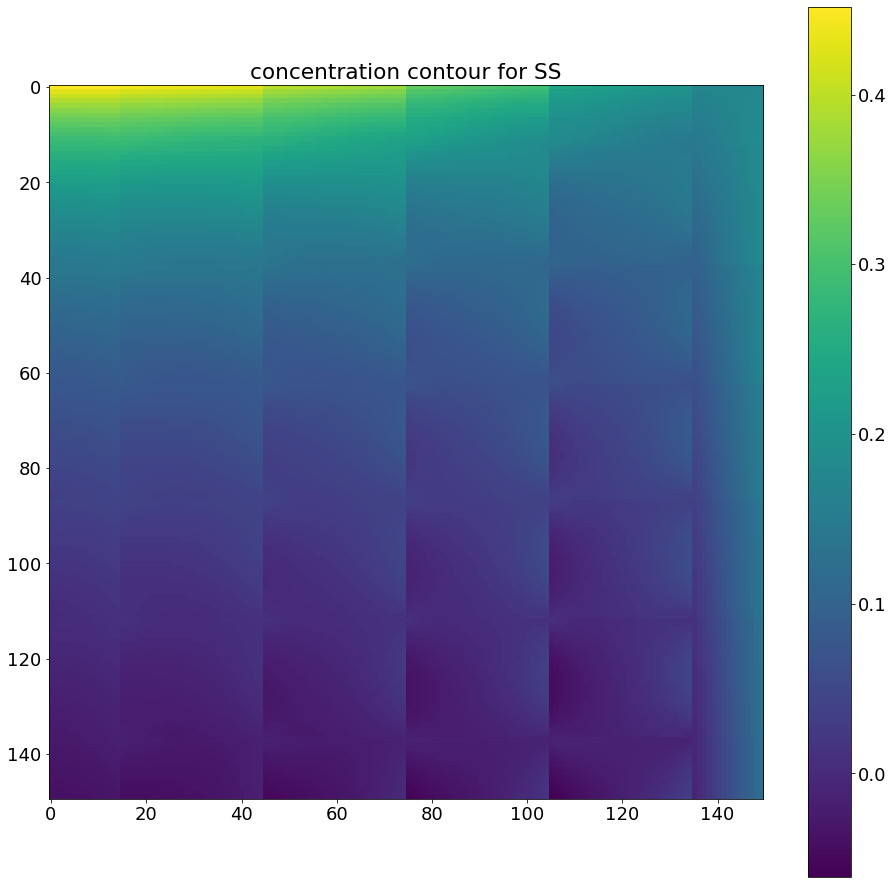

In [53]:
plt.figure()
plt.imshow(sol_final)
plt.title("concentration contour for SS")
plt.colorbar()

len(np.where(sol_final<0)[0])

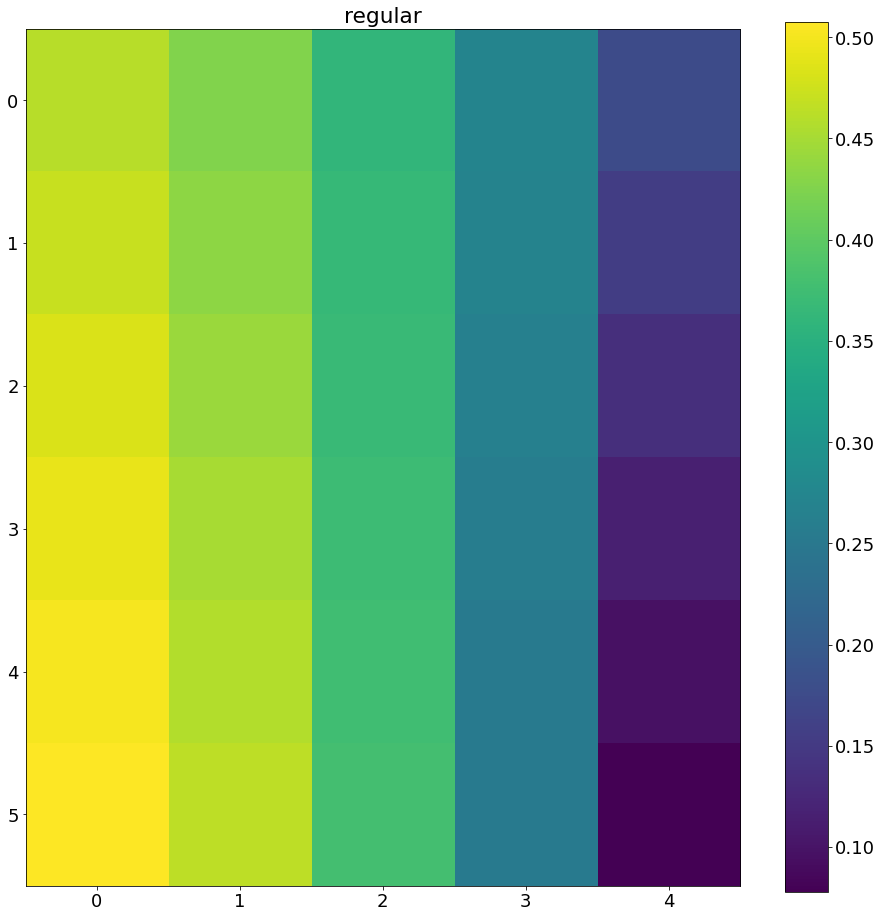

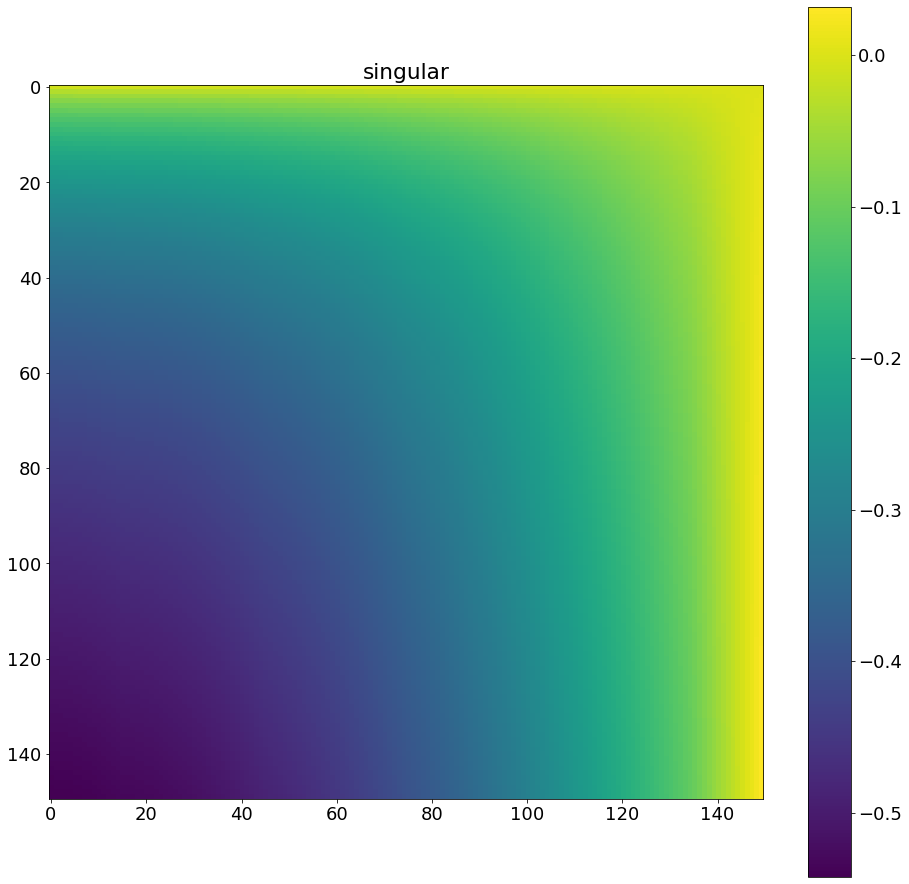

In [54]:
plt.imshow(VghostsSC1C); plt.colorbar(); plt.title("regular")

plt.figure()
plt.imshow(sing)
plt.title("singular")
plt.colorbar()

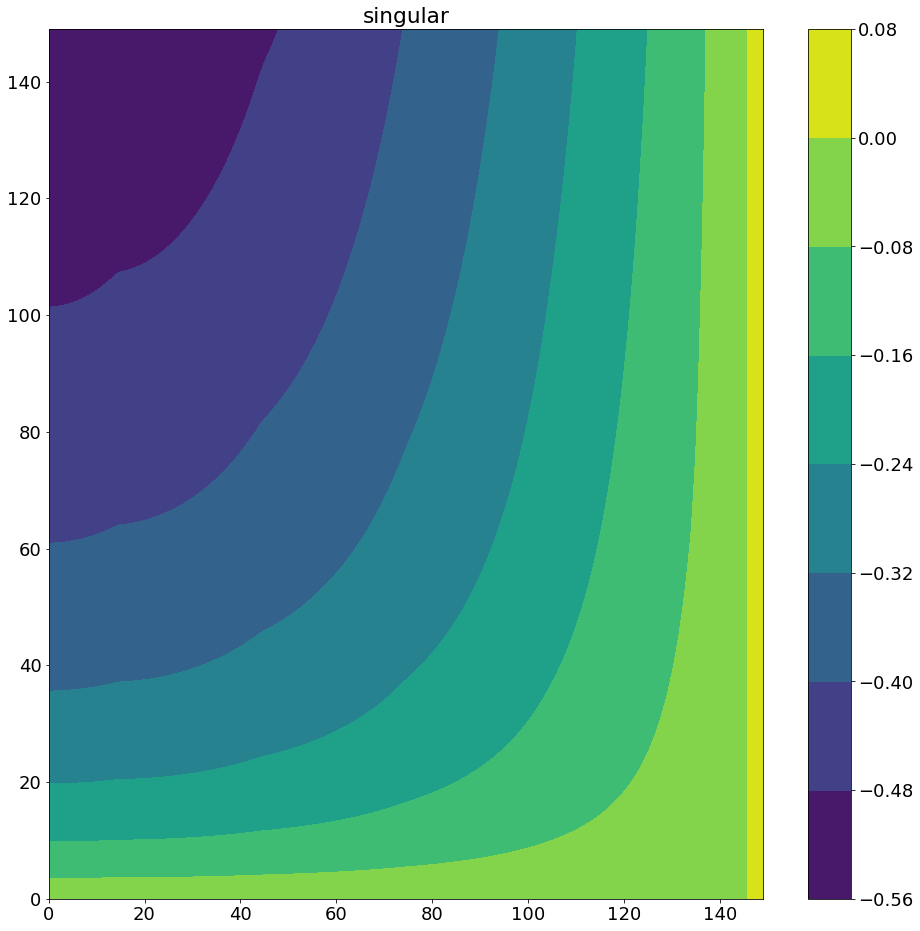

In [59]:
plt.figure()
plt.contourf(sing)
plt.title("singular")
plt.colorbar()

Text(0.5, 1.0, 'regular')

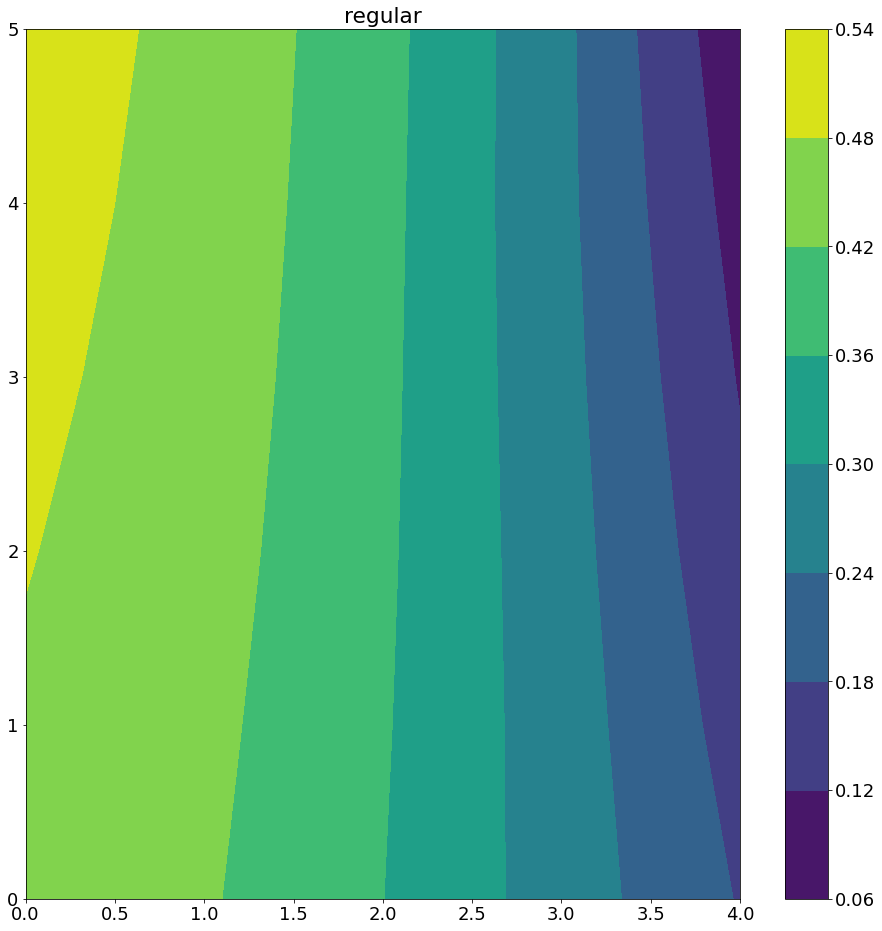

In [55]:
plt.contourf(VghostsSC1C); plt.colorbar(); plt.title("regular")




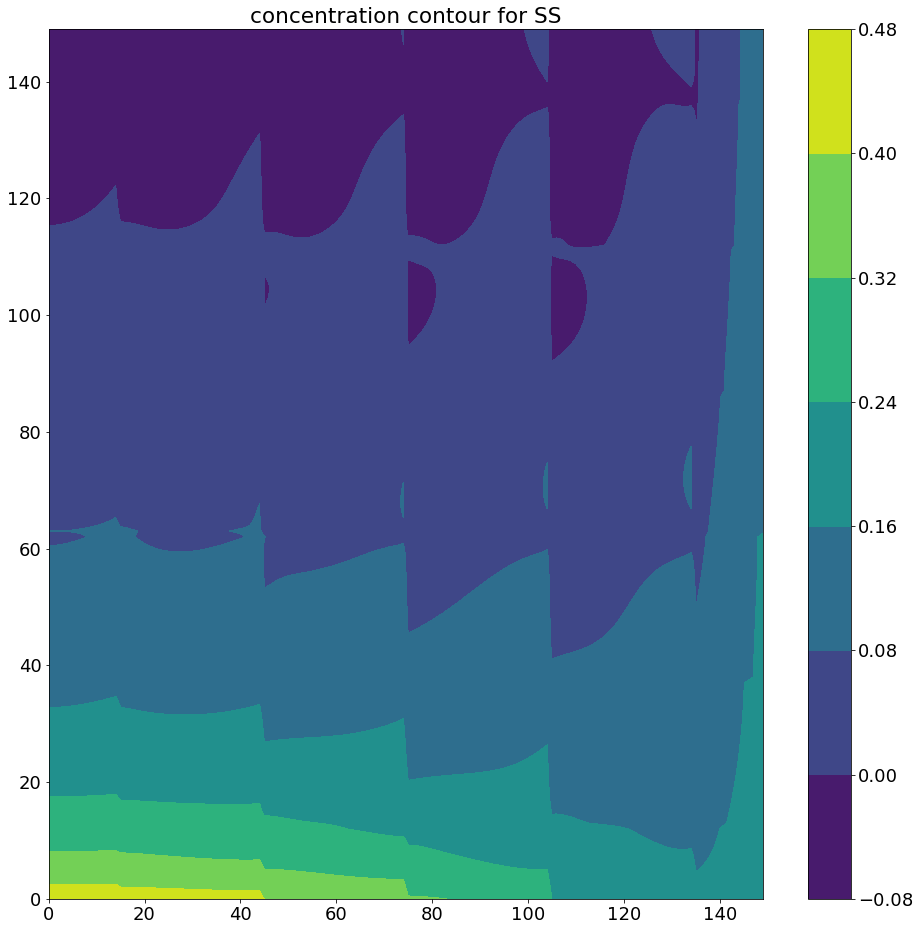

In [56]:
plt.figure()
plt.contourf(sol_final)
plt.title("concentration contour for SS")
plt.colorbar()

In [57]:
ii

array([0.4618984 , 0.4618984 , 0.4618984 , 0.4618984 , 0.4618984 ,
       0.4618984 , 0.4618984 , 0.4618984 , 0.4618984 , 0.4618984 ,
       0.4618984 , 0.4618984 , 0.4618984 , 0.4618984 , 0.4618984 ,
       0.46130906, 0.46013037, 0.45895169, 0.45777301, 0.45659432,
       0.45541564, 0.45423695, 0.45305827, 0.45187958, 0.4507009 ,
       0.44952221, 0.44834353, 0.44716484, 0.44598616, 0.44480748,
       0.44362879, 0.44245011, 0.44127142, 0.44009274, 0.43891405,
       0.43773537, 0.43655668, 0.435378  , 0.43419932, 0.43302063,
       0.43184195, 0.43066326, 0.42948458, 0.42830589, 0.42712721,
       0.42543865, 0.42324021, 0.42104177, 0.41884333, 0.41664489,
       0.41444645, 0.41224801, 0.41004957, 0.40785113, 0.40565269,
       0.40345425, 0.40125581, 0.39905737, 0.39685893, 0.39466049,
       0.39246205, 0.39026361, 0.38806517, 0.38586673, 0.38366829,
       0.38146986, 0.37927142, 0.37707298, 0.37487454, 0.3726761 ,
       0.37047766, 0.36827922, 0.36608078, 0.36388234, 0.36168

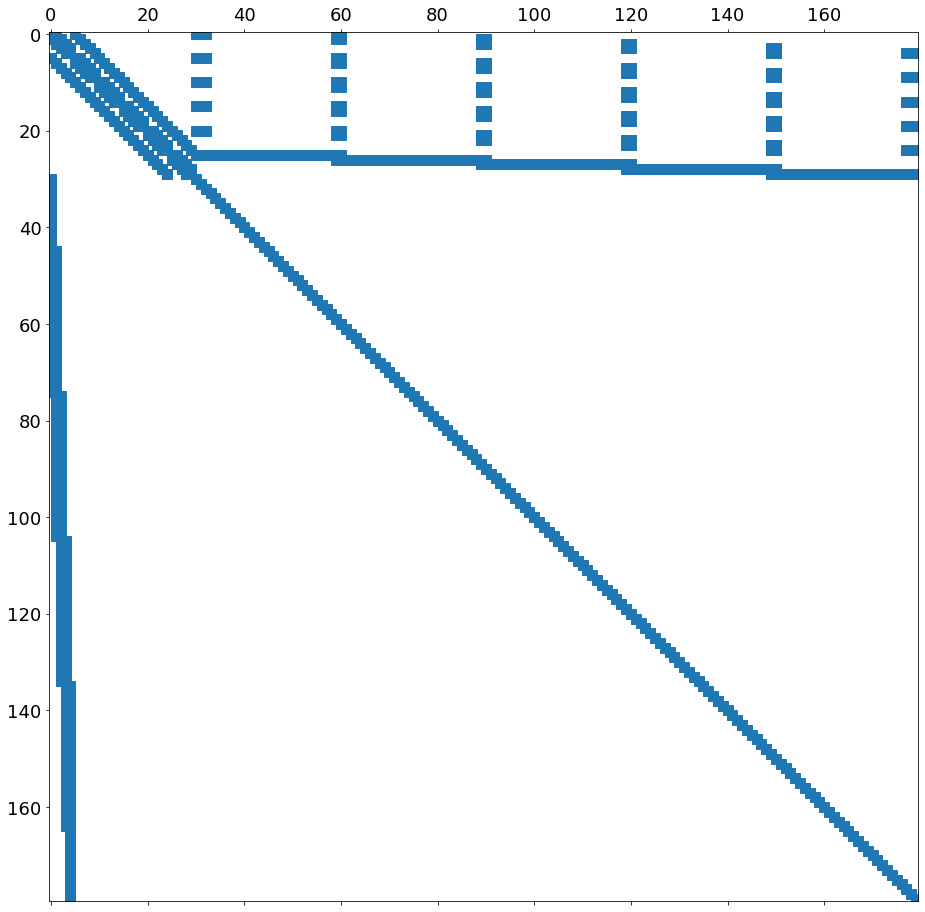

In [58]:
plt.spy(M)